In [58]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

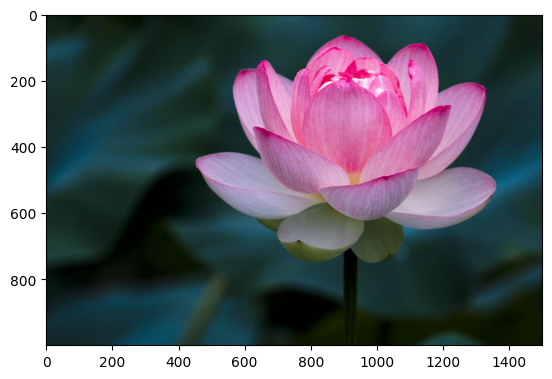

In [59]:
image_path = './image.png'
image = Image.open(image_path)
plt.imshow(image)

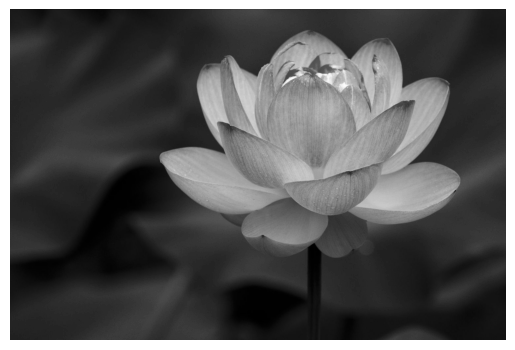

In [60]:
# Extract RGB values from the original image
rgb_array = np.array(image)
plt.imshow(image)
# Convert the RGB image to grayscale image
gray_image = image.convert('L')
plt.imshow(gray_image, cmap='gray')
plt.axis('off')
plt.show()

In [61]:
# Convert to numpy array and then to 8-bit binary
gray_array = np.array(gray_image)
print(gray_array)

[[23 24 26 ... 29 29 29]
 [24 25 26 ... 29 29 29]
 [25 25 25 ... 29 29 29]
 ...
 [33 33 33 ... 18 18 18]
 [33 33 33 ... 17 17 18]
 [33 33 33 ... 17 17 18]]


In [62]:
# Create bit planes
bit_planes = np.unpackbits(np.expand_dims(gray_array, axis=-1), axis=-1)
# Reshape the bit planes to form a 3D array
bit_planes_3d = bit_planes.reshape(gray_array.shape + (8,))

# Print the shape of the 3D array and a small part of the array
print("Shape of the 3D array:", bit_planes_3d.shape)
print("Small section of the array:")
print(bit_planes_3d)  # Print the first 5x5 section of the bit planes

Shape of the 3D array: (1000, 1500, 8)
Small section of the array:
[[[0 0 0 ... 1 1 1]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 1 0]
  ...
  [0 0 0 ... 1 0 1]
  [0 0 0 ... 1 0 1]
  [0 0 0 ... 1 0 1]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 1]
  [0 0 0 ... 0 1 0]
  ...
  [0 0 0 ... 1 0 1]
  [0 0 0 ... 1 0 1]
  [0 0 0 ... 1 0 1]]

 [[0 0 0 ... 0 0 1]
  [0 0 0 ... 0 0 1]
  [0 0 0 ... 0 0 1]
  ...
  [0 0 0 ... 1 0 1]
  [0 0 0 ... 1 0 1]
  [0 0 0 ... 1 0 1]]

 ...

 [[0 0 1 ... 0 0 1]
  [0 0 1 ... 0 0 1]
  [0 0 1 ... 0 0 1]
  ...
  [0 0 0 ... 0 1 0]
  [0 0 0 ... 0 1 0]
  [0 0 0 ... 0 1 0]]

 [[0 0 1 ... 0 0 1]
  [0 0 1 ... 0 0 1]
  [0 0 1 ... 0 0 1]
  ...
  [0 0 0 ... 0 0 1]
  [0 0 0 ... 0 0 1]
  [0 0 0 ... 0 1 0]]

 [[0 0 1 ... 0 0 1]
  [0 0 1 ... 0 0 1]
  [0 0 1 ... 0 0 1]
  ...
  [0 0 0 ... 0 0 1]
  [0 0 0 ... 0 0 1]
  [0 0 0 ... 0 1 0]]]


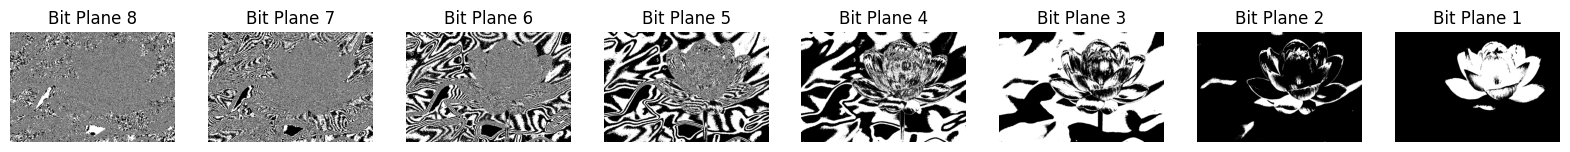

In [63]:
# Stack all bit planes horizontally to form a 3D cube
bit_cube = np.concatenate([bit_planes_3d[:, :, 7 - bit][:, :, np.newaxis] for bit in range(8)], axis=-1)

# Display each bit plane as a subplot
fig, axes = plt.subplots(1, 8, figsize=(20, 3))

for i, ax in enumerate(axes):
    ax.imshow(bit_cube[:, :, i], cmap='gray')
    ax.set_title(f"Bit Plane {8 - i}")
    ax.axis('off')

plt.show()

In [64]:
# Shuffle the binary values in the 3D matrix
shuffled_bit_planes_3d = 1 - bit_planes_3d

# Print the shape of the shuffled 3D array and a small part of the array
print("Shape of the shuffled 3D array:", shuffled_bit_planes_3d.shape)
print("Small section of the shuffled array:")
print(shuffled_bit_planes_3d)  # Print the first 5x5 section of the shuffled bit planes

Shape of the shuffled 3D array: (1000, 1500, 8)
Small section of the shuffled array:
[[[1 1 1 ... 0 0 0]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 0 1]
  ...
  [1 1 1 ... 0 1 0]
  [1 1 1 ... 0 1 0]
  [1 1 1 ... 0 1 0]]

 [[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 0]
  [1 1 1 ... 1 0 1]
  ...
  [1 1 1 ... 0 1 0]
  [1 1 1 ... 0 1 0]
  [1 1 1 ... 0 1 0]]

 [[1 1 1 ... 1 1 0]
  [1 1 1 ... 1 1 0]
  [1 1 1 ... 1 1 0]
  ...
  [1 1 1 ... 0 1 0]
  [1 1 1 ... 0 1 0]
  [1 1 1 ... 0 1 0]]

 ...

 [[1 1 0 ... 1 1 0]
  [1 1 0 ... 1 1 0]
  [1 1 0 ... 1 1 0]
  ...
  [1 1 1 ... 1 0 1]
  [1 1 1 ... 1 0 1]
  [1 1 1 ... 1 0 1]]

 [[1 1 0 ... 1 1 0]
  [1 1 0 ... 1 1 0]
  [1 1 0 ... 1 1 0]
  ...
  [1 1 1 ... 1 1 0]
  [1 1 1 ... 1 1 0]
  [1 1 1 ... 1 0 1]]

 [[1 1 0 ... 1 1 0]
  [1 1 0 ... 1 1 0]
  [1 1 0 ... 1 1 0]
  ...
  [1 1 1 ... 1 1 0]
  [1 1 1 ... 1 1 0]
  [1 1 1 ... 1 0 1]]]


In [65]:
# Define the encoding rule
encoding_rule = {
    '00': 'A',
    '11': 'T',
    '01': 'C',
    '10': 'G'
}

# Apply the encoding rule to the entire 3D array
def map_to_dna(bit_planes_3d):
    # Convert 3D array to 2D array for easy processing
    flattened_array = bit_planes_3d.reshape(-1, 8)

    # Convert each 8-bit binary value to DNA sequence
    dna_sequences = []
    for binary_value in flattened_array:
        binary_string = ''.join(map(str, binary_value))
        binary_pairs = [binary_string[i:i+2] for i in range(0, len(binary_string), 2)]
        dna_sequence = ''.join(encoding_rule[pair] for pair in binary_pairs)
        dna_sequences.append(dna_sequence)

    # Reshape the result back to the original 3D shape
    mapped_dna_array = np.array(dna_sequences).reshape(bit_planes_3d.shape[:-1])

    return mapped_dna_array

# Apply DNA mapping to the shuffled bit planes
mapped_dna_array = map_to_dna(shuffled_bit_planes_3d)

# Print the shape of the mapped DNA array and the array
print("Shape of the mapped DNA array:", mapped_dna_array.shape)
print(mapped_dna_array)

Shape of the mapped DNA array: (1000, 1500)
[['TGGA' 'TGCT' 'TGCC' ... 'TGAG' 'TGAG' 'TGAG']
 ['TGCT' 'TGCG' 'TGCC' ... 'TGAG' 'TGAG' 'TGAG']
 ['TGCG' 'TGCG' 'TGCG' ... 'TGAG' 'TGAG' 'TGAG']
 ...
 ['TCTG' 'TCTG' 'TCTG' ... 'TGTC' 'TGTC' 'TGTC']
 ['TCTG' 'TCTG' 'TCTG' ... 'TGTG' 'TGTG' 'TGTC']
 ['TCTG' 'TCTG' 'TCTG' ... 'TGTG' 'TGTG' 'TGTC']]


In [66]:
# Define the transcription rule
transcription_rule = {
    'A': 'U',
    'T': 'A',
    'C': 'G',
    'G': 'C'
}

# Apply DNA transcription to the mapped DNA array
def transcribe_dna(mapped_dna_array):
    # Iterate over each element in the array and apply transcription rule
    transcribed_array = np.vectorize(lambda x: ''.join(transcription_rule[n] for n in x))(mapped_dna_array)

    return transcribed_array

# Apply DNA transcription to the mapped DNA array
transcribed_dna_array = transcribe_dna(mapped_dna_array)

# Print the shape of the transcribed DNA array and the array
print("Shape of the transcribed DNA array:", transcribed_dna_array.shape)
print(transcribed_dna_array)


Shape of the transcribed DNA array: (1000, 1500)
[['ACCU' 'ACGA' 'ACGG' ... 'ACUC' 'ACUC' 'ACUC']
 ['ACGA' 'ACGC' 'ACGG' ... 'ACUC' 'ACUC' 'ACUC']
 ['ACGC' 'ACGC' 'ACGC' ... 'ACUC' 'ACUC' 'ACUC']
 ...
 ['AGAC' 'AGAC' 'AGAC' ... 'ACAG' 'ACAG' 'ACAG']
 ['AGAC' 'AGAC' 'AGAC' ... 'ACAC' 'ACAC' 'ACAG']
 ['AGAC' 'AGAC' 'AGAC' ... 'ACAC' 'ACAC' 'ACAG']]


In [67]:
# Define the RNA translation rule
rna_translation_rule = {
    'A': 'U',
    'U': 'G',
    'G': 'C',
    'C': 'A'
}

# Apply RNA translation to the transcribed DNA array
def translate_rna(transcribed_dna_array):
    # Iterate over each element in the array and apply RNA translation rule
    translated_rna_array = np.vectorize(lambda x: ''.join(rna_translation_rule[n] for n in x))(transcribed_dna_array)

    return translated_rna_array

# Apply RNA translation to the transcribed DNA array
translated_rna_array = translate_rna(transcribed_dna_array)

# Print the shape of the translated RNA array and the array
print("Shape of the translated RNA array:", translated_rna_array.shape)
print(translated_rna_array)


Shape of the translated RNA array: (1000, 1500)
[['UAAG' 'UACU' 'UACC' ... 'UAGA' 'UAGA' 'UAGA']
 ['UACU' 'UACA' 'UACC' ... 'UAGA' 'UAGA' 'UAGA']
 ['UACA' 'UACA' 'UACA' ... 'UAGA' 'UAGA' 'UAGA']
 ...
 ['UCUA' 'UCUA' 'UCUA' ... 'UAUC' 'UAUC' 'UAUC']
 ['UCUA' 'UCUA' 'UCUA' ... 'UAUA' 'UAUA' 'UAUC']
 ['UCUA' 'UCUA' 'UCUA' ... 'UAUA' 'UAUA' 'UAUC']]


In [68]:
# Define the RNA mutation rule
rna_mutation_rule = {
    'A': 'G',
    'U': 'C',
    'G': 'A',
    'C': 'U'
}

# Apply RNA mutation to the translated RNA array
def mutate_rna(translated_rna_array):
    # Iterate over each element in the array and apply RNA mutation rule
    mutated_rna_array = np.vectorize(lambda x: ''.join(rna_mutation_rule[n] for n in x))(translated_rna_array)

    return mutated_rna_array

# Apply RNA mutation to the translated RNA array
mutated_rna_array = mutate_rna(translated_rna_array)

# Print the shape of the mutated RNA array and the array
print("Shape of the mutated RNA array:", mutated_rna_array.shape)
print(mutated_rna_array)


Shape of the mutated RNA array: (1000, 1500)
[['CGGA' 'CGUC' 'CGUU' ... 'CGAG' 'CGAG' 'CGAG']
 ['CGUC' 'CGUG' 'CGUU' ... 'CGAG' 'CGAG' 'CGAG']
 ['CGUG' 'CGUG' 'CGUG' ... 'CGAG' 'CGAG' 'CGAG']
 ...
 ['CUCG' 'CUCG' 'CUCG' ... 'CGCU' 'CGCU' 'CGCU']
 ['CUCG' 'CUCG' 'CUCG' ... 'CGCG' 'CGCG' 'CGCU']
 ['CUCG' 'CUCG' 'CUCG' ... 'CGCG' 'CGCG' 'CGCU']]


In [69]:
encryption_rules = {
  'A':'00', 
  'U':'11', 
  'G':'01', 
  'C':'10'
}
# Initialize output 3D array 
binary_array = np.zeros((len(mutated_rna_array), len(mutated_rna_array[0]), len(mutated_rna_array[0][0])*2), dtype=int)

# Map each base to binary 
for i in range(len(mutated_rna_array)):
  for j in range(len(mutated_rna_array[i])):
    for k, base in enumerate(mutated_rna_array[i][j]):
      binary_array[i,j,k*2:k*2+2] = [int(x) for x in encryption_rules[base]] 
print("Shape of the 3D array:", binary_array.shape)
print(binary_array)

Shape of the 3D array: (1000, 1500, 8)
[[[1 0 0 ... 1 0 0]
  [1 0 0 ... 1 1 0]
  [1 0 0 ... 1 1 1]
  ...
  [1 0 0 ... 0 0 1]
  [1 0 0 ... 0 0 1]
  [1 0 0 ... 0 0 1]]

 [[1 0 0 ... 1 1 0]
  [1 0 0 ... 1 0 1]
  [1 0 0 ... 1 1 1]
  ...
  [1 0 0 ... 0 0 1]
  [1 0 0 ... 0 0 1]
  [1 0 0 ... 0 0 1]]

 [[1 0 0 ... 1 0 1]
  [1 0 0 ... 1 0 1]
  [1 0 0 ... 1 0 1]
  ...
  [1 0 0 ... 0 0 1]
  [1 0 0 ... 0 0 1]
  [1 0 0 ... 0 0 1]]

 ...

 [[1 0 1 ... 0 0 1]
  [1 0 1 ... 0 0 1]
  [1 0 1 ... 0 0 1]
  ...
  [1 0 0 ... 0 1 1]
  [1 0 0 ... 0 1 1]
  [1 0 0 ... 0 1 1]]

 [[1 0 1 ... 0 0 1]
  [1 0 1 ... 0 0 1]
  [1 0 1 ... 0 0 1]
  ...
  [1 0 0 ... 0 0 1]
  [1 0 0 ... 0 0 1]
  [1 0 0 ... 0 1 1]]

 [[1 0 1 ... 0 0 1]
  [1 0 1 ... 0 0 1]
  [1 0 1 ... 0 0 1]
  ...
  [1 0 0 ... 0 0 1]
  [1 0 0 ... 0 0 1]
  [1 0 0 ... 0 1 1]]]


In [70]:
# Number of rows and columns in the binary_array
num_rows, num_cols, num_channels = binary_array.shape

# Print the obtained dimensions
print("Number of Rows:", num_rows)
print("Number of Columns:", num_cols)
print("Number of Channels:", num_channels)


Number of Rows: 1000
Number of Columns: 1500
Number of Channels: 8


(1000, 1500, 8)


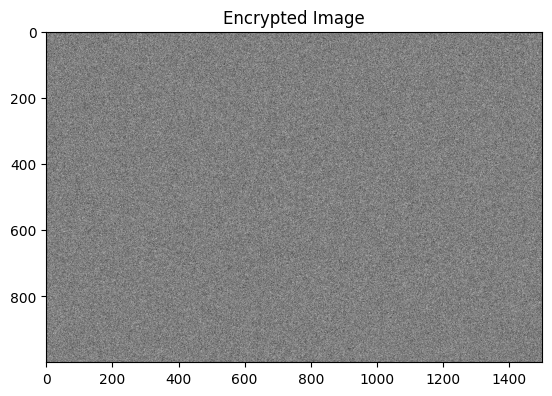

In [71]:
# Initialize random 3D binary array
binary_array = np.random.randint(0, 2, size=(num_rows, num_cols, num_channels))

# Print shape to validate 3D  
print(binary_array.shape) 

# Get dimensions
rows, cols, channels = binary_array.shape  

# Create empty image array
image = np.zeros((rows, cols))

# Populate image by summing values across channels
for i in range(rows):
  for j in range(cols):
    image[i,j] = np.sum(binary_array[i,j,:])

# Normalize to 0-255 range
image = image - np.min(image)
image = (255*image/np.max(image)).astype(np.uint8)

# Display encrypted image
plt.imshow(image, cmap='gray')
plt.title('Encrypted Image')
plt.show()

# Save encrypted image 
plt.imsave('encrypted_image.png', image, cmap='gray')

In [72]:
# Define the reverse RNA mutation rule
reverse_rna_mutation_rule = {
    'A': 'G',
    'U': 'C',
    'G': 'A',
    'C': 'U'
}

# Apply reverse RNA mutation to the mutated RNA array
def reverse_mutate_rna(mutated_rna_array):
    # Iterate over each element in the array and apply reverse RNA mutation rule
    reversed_mutated_rna_array = np.vectorize(lambda x: ''.join(reverse_rna_mutation_rule[n] for n in x))(mutated_rna_array)

    return reversed_mutated_rna_array

# Apply reverse RNA mutation to the mutated RNA array
reversed_mutated_rna_array = reverse_mutate_rna(mutated_rna_array)

# Print the shape of the reversed mutated RNA array and the array
print("Shape of the reversed mutated RNA array:", reversed_mutated_rna_array.shape)
print(reversed_mutated_rna_array)


Shape of the reversed mutated RNA array: (1000, 1500)
[['UAAG' 'UACU' 'UACC' ... 'UAGA' 'UAGA' 'UAGA']
 ['UACU' 'UACA' 'UACC' ... 'UAGA' 'UAGA' 'UAGA']
 ['UACA' 'UACA' 'UACA' ... 'UAGA' 'UAGA' 'UAGA']
 ...
 ['UCUA' 'UCUA' 'UCUA' ... 'UAUC' 'UAUC' 'UAUC']
 ['UCUA' 'UCUA' 'UCUA' ... 'UAUA' 'UAUA' 'UAUC']
 ['UCUA' 'UCUA' 'UCUA' ... 'UAUA' 'UAUA' 'UAUC']]


In [73]:
# Define the reverse RNA translation rule
reverse_rna_translation_rule = {
    'A': 'C',
    'U': 'A',
    'G': 'U',
    'C': 'G'
}

# Apply reverse RNA translation to the reversed mutated RNA array
def reverse_translate_rna(reversed_mutated_rna_array):
    # Iterate over each element in the array and apply reverse RNA translation rule
    reversed_translated_rna_array = np.vectorize(lambda x: ''.join(reverse_rna_translation_rule[n] for n in x))(reversed_mutated_rna_array)

    return reversed_translated_rna_array

# Apply reverse RNA translation to the reversed mutated RNA array
reversed_translated_rna_array = reverse_translate_rna(reversed_mutated_rna_array)

# Print the shape of the reversed translated RNA array and the array
print("Shape of the reversed translated RNA array:", reversed_translated_rna_array.shape)
print(reversed_translated_rna_array)


Shape of the reversed translated RNA array: (1000, 1500)
[['ACCU' 'ACGA' 'ACGG' ... 'ACUC' 'ACUC' 'ACUC']
 ['ACGA' 'ACGC' 'ACGG' ... 'ACUC' 'ACUC' 'ACUC']
 ['ACGC' 'ACGC' 'ACGC' ... 'ACUC' 'ACUC' 'ACUC']
 ...
 ['AGAC' 'AGAC' 'AGAC' ... 'ACAG' 'ACAG' 'ACAG']
 ['AGAC' 'AGAC' 'AGAC' ... 'ACAC' 'ACAC' 'ACAG']
 ['AGAC' 'AGAC' 'AGAC' ... 'ACAC' 'ACAC' 'ACAG']]


In [74]:
# Define the reverse DNA transcription rule
reverse_dna_transcription_rule = {
    'A': 'T',
    'U': 'A',
    'G': 'C',
    'C': 'G'
}

# Apply reverse DNA transcription to the reversed translated RNA array
def reverse_transcribe_dna(reversed_translated_rna_array):
    # Iterate over each element in the array and apply reverse DNA transcription rule
    reversed_transcribed_dna_array = np.vectorize(lambda x: ''.join(reverse_dna_transcription_rule[n] for n in x))(reversed_translated_rna_array)

    return reversed_transcribed_dna_array

# Apply reverse DNA transcription to the reversed translated RNA array
reversed_transcribed_dna_array = reverse_transcribe_dna(reversed_translated_rna_array)

# Print the shape of the reversed transcribed DNA array and the array
print("Shape of the reversed transcribed DNA array:", reversed_transcribed_dna_array.shape)
print(reversed_transcribed_dna_array)


Shape of the reversed transcribed DNA array: (1000, 1500)
[['TGGA' 'TGCT' 'TGCC' ... 'TGAG' 'TGAG' 'TGAG']
 ['TGCT' 'TGCG' 'TGCC' ... 'TGAG' 'TGAG' 'TGAG']
 ['TGCG' 'TGCG' 'TGCG' ... 'TGAG' 'TGAG' 'TGAG']
 ...
 ['TCTG' 'TCTG' 'TCTG' ... 'TGTC' 'TGTC' 'TGTC']
 ['TCTG' 'TCTG' 'TCTG' ... 'TGTG' 'TGTG' 'TGTC']
 ['TCTG' 'TCTG' 'TCTG' ... 'TGTG' 'TGTG' 'TGTC']]


In [75]:
# Reverse Encoding Rule
reverse_encoding_rule = {
    'A': '00',
    'T': '11',
    'C': '01',
    'G': '10'
}

# Apply the reverse encoding rule to the entire 3D array
def reverse_map_to_dna(reversed_transcribed_dna_array):
    # Convert 3D array to 2D array for easy processing
    flattened_array = reversed_transcribed_dna_array.reshape(-1)

    # Convert each DNA sequence to 8-bit binary values
    binary_sequences = []
    for dna_sequence in flattened_array:
        binary_pairs = [reverse_encoding_rule[base] for base in dna_sequence]
        binary_string = ''.join(binary_pairs)
        binary_values = [int(bit) for bit in binary_string]
        binary_sequences.append(binary_values)

    # Reshape the result back to the original 3D shape
    reversed_bit_planes_3d = np.array(binary_sequences).reshape(reversed_transcribed_dna_array.shape + (8,))

    return reversed_bit_planes_3d

# Apply the reverse DNA mapping to obtain the shuffled bit planes
reversed_bit_planes_3d = reverse_map_to_dna(reversed_transcribed_dna_array)

# Print the shape of the reversed bit planes 3D array and the array
print("Shape of the reversed bit planes 3D array:", reversed_bit_planes_3d.shape)
print("Small section of the reversed bit planes 3D array:")
print(reversed_bit_planes_3d) 

Shape of the reversed bit planes 3D array: (1000, 1500, 8)
Small section of the reversed bit planes 3D array:
[[[1 1 1 ... 0 0 0]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 0 1]
  ...
  [1 1 1 ... 0 1 0]
  [1 1 1 ... 0 1 0]
  [1 1 1 ... 0 1 0]]

 [[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 0]
  [1 1 1 ... 1 0 1]
  ...
  [1 1 1 ... 0 1 0]
  [1 1 1 ... 0 1 0]
  [1 1 1 ... 0 1 0]]

 [[1 1 1 ... 1 1 0]
  [1 1 1 ... 1 1 0]
  [1 1 1 ... 1 1 0]
  ...
  [1 1 1 ... 0 1 0]
  [1 1 1 ... 0 1 0]
  [1 1 1 ... 0 1 0]]

 ...

 [[1 1 0 ... 1 1 0]
  [1 1 0 ... 1 1 0]
  [1 1 0 ... 1 1 0]
  ...
  [1 1 1 ... 1 0 1]
  [1 1 1 ... 1 0 1]
  [1 1 1 ... 1 0 1]]

 [[1 1 0 ... 1 1 0]
  [1 1 0 ... 1 1 0]
  [1 1 0 ... 1 1 0]
  ...
  [1 1 1 ... 1 1 0]
  [1 1 1 ... 1 1 0]
  [1 1 1 ... 1 0 1]]

 [[1 1 0 ... 1 1 0]
  [1 1 0 ... 1 1 0]
  [1 1 0 ... 1 1 0]
  ...
  [1 1 1 ... 1 1 0]
  [1 1 1 ... 1 1 0]
  [1 1 1 ... 1 0 1]]]


In [76]:
# Function to unscramble the matrix by flipping 1s to 0s and vice versa
def unscramble_matrix(reversed_bit_planes_3d):
    unscrambled_bit_planes_3d = 1 - reversed_bit_planes_3d  # Flip 1s to 0s and vice versa
    return unscrambled_bit_planes_3d

# Apply the unscrambling operation to the reversed bit planes 3D array
unscrambled_bit_planes_3d = unscramble_matrix(reversed_bit_planes_3d)

# Print the shape of the unscrambled bit planes 3D array and a small part of the array
print("Shape of the unscrambled bit planes 3D array:", unscrambled_bit_planes_3d.shape)
print("Small section of the unscrambled bit planes 3D array:")
print(unscrambled_bit_planes_3d)  

Shape of the unscrambled bit planes 3D array: (1000, 1500, 8)
Small section of the unscrambled bit planes 3D array:
[[[0 0 0 ... 1 1 1]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 1 0]
  ...
  [0 0 0 ... 1 0 1]
  [0 0 0 ... 1 0 1]
  [0 0 0 ... 1 0 1]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 1]
  [0 0 0 ... 0 1 0]
  ...
  [0 0 0 ... 1 0 1]
  [0 0 0 ... 1 0 1]
  [0 0 0 ... 1 0 1]]

 [[0 0 0 ... 0 0 1]
  [0 0 0 ... 0 0 1]
  [0 0 0 ... 0 0 1]
  ...
  [0 0 0 ... 1 0 1]
  [0 0 0 ... 1 0 1]
  [0 0 0 ... 1 0 1]]

 ...

 [[0 0 1 ... 0 0 1]
  [0 0 1 ... 0 0 1]
  [0 0 1 ... 0 0 1]
  ...
  [0 0 0 ... 0 1 0]
  [0 0 0 ... 0 1 0]
  [0 0 0 ... 0 1 0]]

 [[0 0 1 ... 0 0 1]
  [0 0 1 ... 0 0 1]
  [0 0 1 ... 0 0 1]
  ...
  [0 0 0 ... 0 0 1]
  [0 0 0 ... 0 0 1]
  [0 0 0 ... 0 1 0]]

 [[0 0 1 ... 0 0 1]
  [0 0 1 ... 0 0 1]
  [0 0 1 ... 0 0 1]
  ...
  [0 0 0 ... 0 0 1]
  [0 0 0 ... 0 0 1]
  [0 0 0 ... 0 1 0]]]


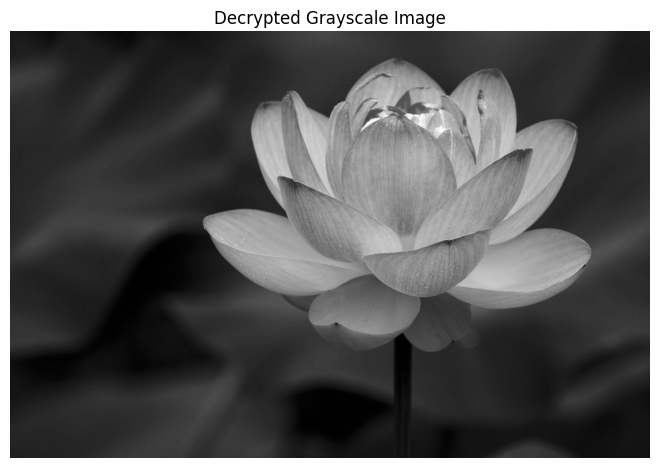

In [77]:
# Function to convert a binary matrix to pixel values
def binary_to_pixels(binary_matrix):
    # Reshape the binary matrix to a flat 1D array
    flat_binary = binary_matrix.reshape(-1, 8)

    # Convert each 8-bit binary value to an integer
    pixel_values = []
    for binary_value in flat_binary:
        binary_string = ''.join(map(str, binary_value))
        decimal_value = int(binary_string, 2)
        pixel_values.append(decimal_value)

    # Reshape the result back to the original 2D shape (image dimensions)
    pixel_array = np.array(pixel_values, dtype=np.uint8).reshape(binary_matrix.shape[:-1])

    return pixel_array

# Apply the conversion to pixel values
pixel_image = binary_to_pixels(unscrambled_bit_planes_3d)

# Display the pixel image
plt.imshow(pixel_image, cmap='gray')
plt.title('Decrypted Grayscale Image')
plt.axis('off')
plt.gca().set_axis_off()
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0, 0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.gca().set_facecolor("None")

plt.show()

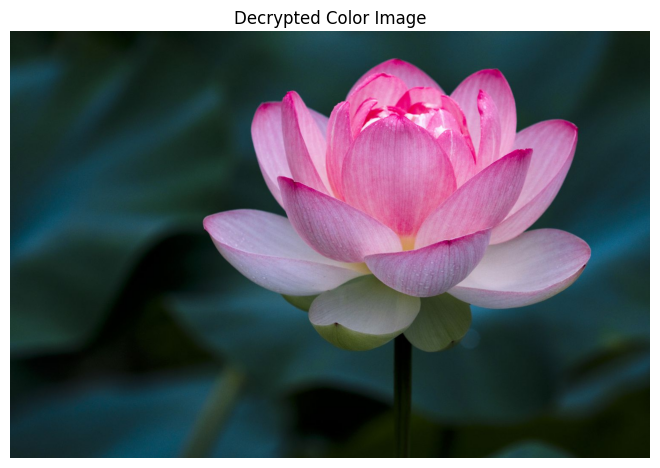

In [80]:
# Assuming you have the unscrambled grayscale image in 'pixel_image'
# Convert the grayscale image to a color image using the stored RGB values
color_image = np.stack((pixel_image,) * 3, axis=-1)

# Display the color image
plt.imshow(rgb_array)
plt.title('Decrypted Color Image')
plt.axis('off')
plt.gca().set_axis_off()
plt.subplots_adjust(top=1, bottom=0, right=1, left=0, hspace=0, wspace=0)
plt.margins(0, 0)
plt.gca().xaxis.set_major_locator(plt.NullLocator())
plt.gca().yaxis.set_major_locator(plt.NullLocator())
plt.gca().set_facecolor("None")

plt.show()
